# Scatterplot Matrices & Heatmap & Parallel Coordinates

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix  
from pandas.plotting import parallel_coordinates  
import seaborn as sns
import altair as alt

In [2]:
#Switch to Jupyter Notebook mode of matplotlib (pandas is using matplotlib for the scatterplot matrix)
%matplotlib inline   

sns.set(style="ticks") # use ticks on plot axes

# Starting with altair v4, enabling a notebook renderer is no longer necessary: alt.renderers.enable('notebook') 
alt.__version__

'4.1.0'

## Dataset  

In [3]:
# Load the pokemon/fifa dataset
df_data = pd.read_csv('./pokemon.csv')
# More infomation about the dataset: https://www.kaggle.com/rounakbanik/pokemon

#df_data = pd.read_csv('./FIFA19_players.csv')
# More infomation about the dataset: https://www.kaggle.com/karangadiya/fifa19

In [4]:
# Inspect the dataset 
# See https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
df_data.dtypes # No semicolon to see the output in the notebook

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [5]:
# Take a glimpse into the data
df_data.head() # No semicolon to see the output in the notebook

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

Hint: Pandas offers [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function to filter out missing data.

## **Student Information**

Name: **Severin Bergsmann**

Student ID: **k12008683**

***

## **<font color=blue>Task:</font> Scatterplot Matrix**
### Simple Scatterplot Matrix
Select more than two attributes that are suitable and create a scatterplot matrix (e.g., with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) or [altair](https://altair-viz.github.io/gallery/scatter_matrix.html)).

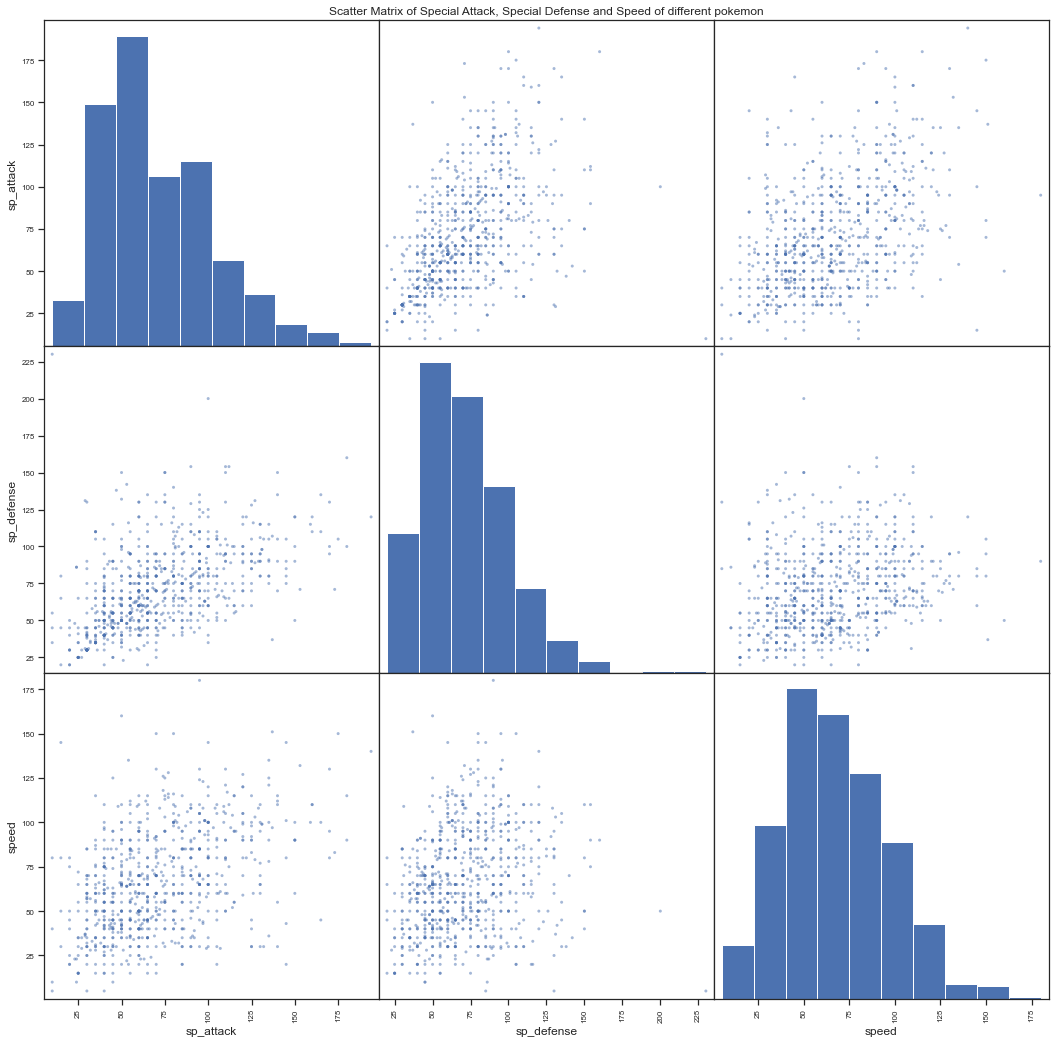

In [6]:
import matplotlib.pyplot as plt # for easier labeling
pokemon = df_data
fig, ax = plt.subplots(3, 3, figsize=(18, 18))
scatter_matrix(
    frame=pokemon[["sp_attack", "sp_defense", "speed"]],
    ax=ax,
)
_ = ax[0, 1].set_title("Scatter Matrix of Special Attack, Special Defense and Speed of different pokemon")

### Colored Scatterplot Matrix
Select a categorical attribute and encode its values with color in the scatterplot matrix (e.g. with [altair](https://altair-viz.github.io/gallery/scatter_matrix.html) again or [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)).

In [7]:
# Plot the selected attributes again and color code the points by position

figsize=220
alt.Chart(pokemon).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color = "is_legendary:N"
).properties(
    height=figsize,
    width=figsize
).repeat(
    row=["hp", "weight_kg", "height_m"],
    column=["hp", "weight_kg", "height_m"]
)

alt.RepeatChart(...)

### Interpretation

#### sp_attack - sp_defense - speed scatter matrix:
The overall trend in all special attack, special defence and speed is the higher the value the more rare the number of pokemon gets. One also may observe that pokemon with high special defense tend to have less speed. This is not the case for pokemon with high special attack, where indeed pokemon with high stats in both attributes occur.

#### hp - weight_kg - height_m scatter matrix:
Again the majority of pokemon have merged in proximity regions concerning the separate stats. One also observes that the hp of legendary pokemon does not differ so much from other pokemon whereas legendaries tend to be heavier than others. Also the height gives rise to shear difference between those two groups.

## **<font color=blue>Task:</font> Heat Map**
Select suitable attributes and visualise the data in a heatmap, e.g. with [seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html) or [altair](https://altair-viz.github.io/gallery/simple_heatmap.html).  
Do not create a correlation heatmap. Correlations can already be read from the scatterplot matrix.

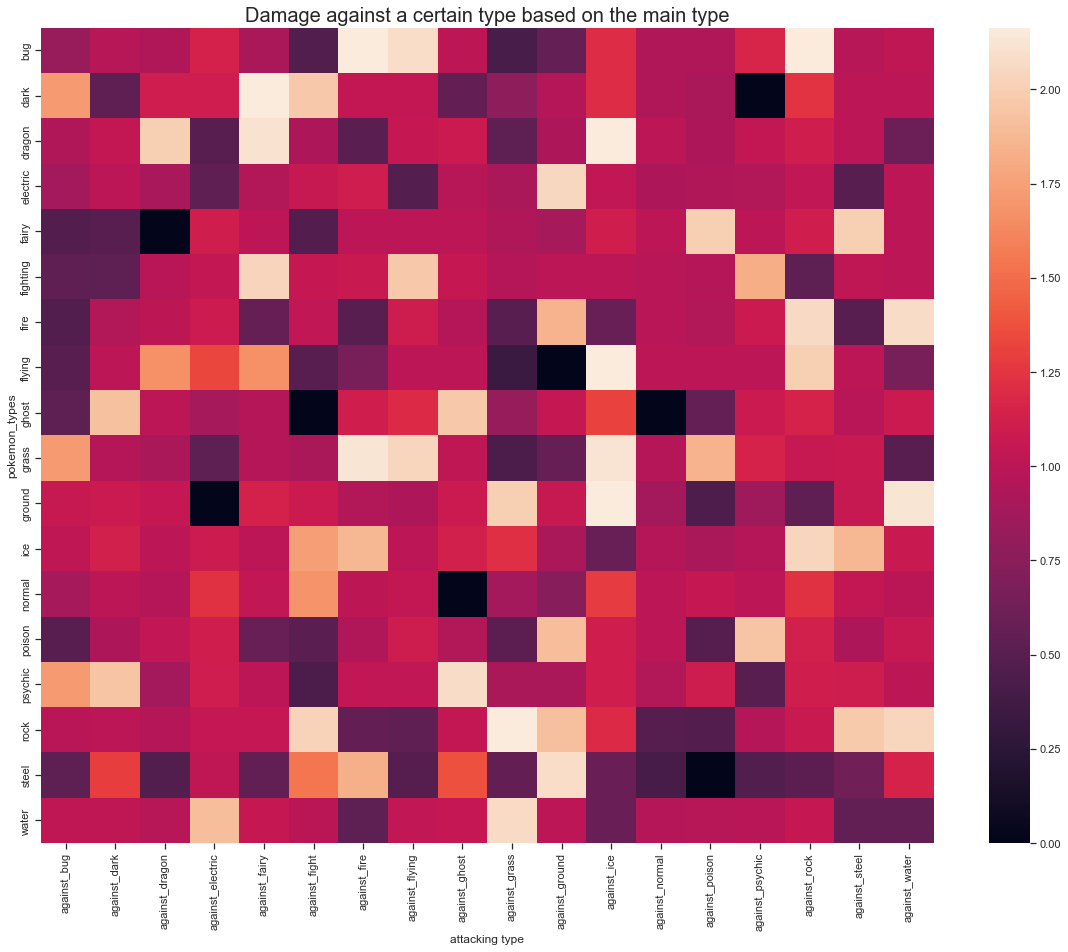

In [8]:
import matplotlib.pyplot as plt # just for increasing the size of sns.heatmap
pokemon_heatmap_data = pokemon[pokemon.columns[1:19]].copy()
pokemon_types = pokemon[["type1", "type2"]].apply(lambda row: ", ".join([row[0]]), axis=1)
pokemon_types.name = "pokemon_types"
pokemon_heatmap_data = pd.concat([pokemon_heatmap_data, pokemon_types], axis = 1)
pokemon_heatmap_data = pokemon_heatmap_data.groupby(["pokemon_types"]).mean()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(pokemon_heatmap_data, ax=ax, robust=True)
ax.set_xlabel("attacking type")
_ = ax.set_title("Damage against a certain type based on the main type", size=20)

### Interpretation

The first properties that chatch one's eye is the general effectivity of ice against flying. Also the strong resistance of steel against most attacking types. The only major enemy to steel is a ground attack. Also the ineffectiveness of bug attacks overall is clearly visible. One can also perfectly observe the attacks with no effectiveness at all to certain types, e.g. ground attacks to flying types or ghost attacks to normal types.

## **<font color=blue>Task:</font> Parallel Coordinates**
Select a categorical attribute and encode the lines with color in the parallel coordinates chart. (e.g. with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html) or [altair](https://altair-viz.github.io/gallery/parallel_coordinates.html)).

In [9]:
pokemon_data = pokemon[pokemon.columns[1:19]].copy()
pokemon_types = pokemon[["type1", "type2"]].apply(lambda row: ", ".join([row[0]]), axis=1)
pokemon_types.name = "pokemon_types"
pokemon_data = pd.concat([pokemon_types, pokemon["generation"]], axis = 1)

# introduce new dimension to count the appearances of every type
pokemon_data["appearance"] = 1
pokemon_data = pokemon_data.groupby(["pokemon_types", "generation"]).count()

# get rid of the newly introduced dimension and replace all NaN values in the dataframe.
pokemon_data = pokemon_data.unstack(level=0)["appearance"].reset_index().fillna(0)

alt.Chart(pokemon_heatmap_data, title="Newly added pokemons with certain types per generation").transform_fold(
    pokemon_heatmap_data.columns.to_list()[1:]
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='generation:N',
    opacity=alt.value(0.5)
).properties(width=800, height=500)

alt.Chart(...)

### Interpretation

One can easily observe that in the first generation the most pokemons which have type water, normal and fire, were introduced to the game. Especially in the later generation, like generation 6, new pokemon types like fairy were introduced an therefore the spike on the yellow line at fairy.

***

## **Submission**

Please add your student information (name,student ID) and download this notebook as HTML (File > Export Notebook As... > Export Notebook to HTML) and submit it.